In [1]:
from scipy.signal import *
import scipy
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import tf2ss
from scipy.signal import ss2tf

In [2]:
f = tf([1, -1, 1], [5, 7, 1, 1])
f


     s^2 - s + 1
---------------------
5 s^3 + 7 s^2 + s + 1

ПЕРЕХОД К НЕУСТОЙЧИВОЙ СИСТЕМЕ

In [3]:
a = np.array([0, 1, -1, 1])
b = np.array([5, 7, 1, 1])
def plus(a, b, k):
    return (k*a, b - k*a)

def minus(a, b, k):
    return (k*a, b + k*a)

In [5]:
q, w = minus(a, b, 0.4)
o1 = tf(q, w)
o1


    0.4 s^2 - 0.4 s + 0.4
-----------------------------
5 s^3 + 7.4 s^2 + 0.6 s + 1.4

СТУПЕНЬКА НЕУСТОЙЧИВОЙ СИСТЕМЫ

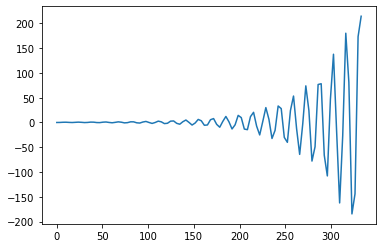

In [6]:
y, x = step(o1)
plt.plot(x, y)

ИМПУЛЬС НЕУСТОЙЧИВОЙ СИСТЕМЫ

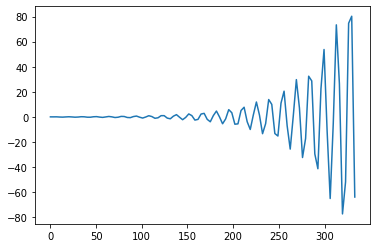

In [7]:
y, x = impulse(o1)
plt.plot(x, y)

ИМПУЛЬС УСТОЙЧИВОЙ СИСТЕМЫ

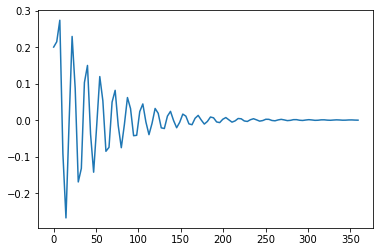

In [8]:
y,x=impulse(f)
y1, x = impulse(f)
plt.plot(x, y)

СТУПЕНЬКА УСТОЙЧИВОЙ СИСТЕМЫ

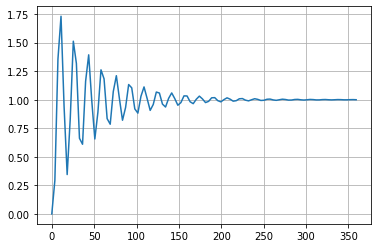

In [9]:
y,x=step(f)
y1, x = step(f)
plt.plot(x, y)
plt.grid(True)
plt.show()

ZPK ФОРМА

In [11]:
a = [1, -1, 1]
b = [5, 7, 1, 1]
A, B, C = scipy.signal.tf2zpk(a, b)
A, B, C

(array([0.5+0.8660254j, 0.5-0.8660254j]),
 array([-1.36102082+0.j        , -0.01948959+0.38284289j,
        -0.01948959-0.38284289j]),
 0.2)

SS ФОРМА

In [13]:
# trf_ss = zpk2ss(trf_zpk)
num = [1, -1, 1]
num1 = [5, 7, 1, 1]
A1, B1, C1, D1 = zpk2ss(A, B, C)
A1, B1, C1, D1

(array([[-1.4, -0.2, -0.2],
        [ 1. ,  0. ,  0. ],
        [ 0. ,  1. ,  0. ]]),
 array([[1.],
        [0.],
        [0.]]),
 array([[ 0.2, -0.2,  0.2]]),
 array([[0.]]))

КАНОНИЧЕСКАЯ ФОРМА УПРАВЛЯЕМОСТИ

In [15]:
A_1 = [[0, 1, 0], [0, 0, 1], [-0.2, -0.2, -1.4]]
B_1 = [0, 0, 1]
C_1 = [0.2, -0.2,  0.2]
print(A_1)
print(B_1)
print(C_1)

[[0, 1, 0], [0, 0, 1], [-0.2, -0.2, -1.4]]
[0, 0, 1]
[0.2, -0.2, 0.2]


КАНОНИЧЕСКАЯ ФОРМА НАБЛЮДАЕМОСТИ

In [16]:
A_2 = [[-1.4, 1, 0], [-0.2, 0, 1], [-0.2, 0, 0]]
B_2 = [[0.2], [-0.2], [0.2]]
C_2 = [1, 0, 0]
print(A_2)
print(B_2)
print(C_2)

[[-1.4, 1, 0], [-0.2, 0, 1], [-0.2, 0, 0]]
[[0.2], [-0.2], [0.2]]
[1, 0, 0]


ПЕРЕХОД К ФОРМЕ ПФ

In [17]:
E, F = scipy.signal.ss2tf(A_2, B_2, C_2, D1)

In [18]:
f1 = tf(E[0], F)
f1


   0.2 s^2 - 0.2 s + 0.2
---------------------------
s^3 + 1.4 s^2 + 0.2 s + 0.2

СТУПЕНЬКА РАЗНОСТИ

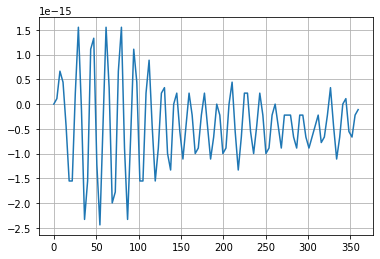

In [19]:
y,x=step(f)
y1, x = step(f1)
plt.plot(x, y - y1)
plt.grid(True)
plt.show()

ИМПУЛЬС РАЗНОСТИ

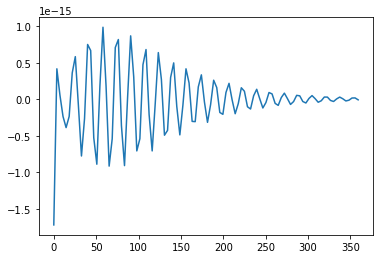

In [20]:
y,x=impulse(f)
y1, x = impulse(f1)
plt.plot(x, y - y1)